# Ridge and Lasso Regression

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Loading Dataset

In [2]:
data = pd.read_excel("../../Datasets/ENB2012_data.xlsx")
display(data)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [3]:
X = data.iloc[:, 0:8]
y = data.iloc[:, 8:10]

In [4]:
display(X)

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [5]:
display(y)

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


## Splitting the Dataset

## Creating a Pipeline

In [6]:
from sklearn.linear_model import Ridge

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

class RidgeLassoRegression():
    """
    A class to perform Ridge or Lasso Regression Model Optimization

    :param alpha: The regularization strength (alpha parameter)
    :param X: Independent variable
    :param y: Dependent variable
    :param regression_type: Type of regression - 'ridge' or 'lasso'
    :param random_state: Random state for reproducibility
    """
    def __init__(self, alpha: float, X: pd.DataFrame, y: pd.Series, 
                 regression_type: str = 'ridge', random_state: int = 42) -> None:
        self.y_pred = None
        self.X_test = None
        self.X_train = None
        self.y_test = None
        self.y_train = None
        self.alpha = alpha
        self.regression_type = regression_type.lower()
        
        # Initialize the appropriate model based on regression type
        if self.regression_type == 'ridge':
            self.model = Ridge(alpha=self.alpha, random_state=random_state)
        elif self.regression_type == 'lasso':
            self.model = Lasso(alpha=self.alpha, random_state=random_state)
        else:
            raise ValueError("regression_type must be either 'ridge' or 'lasso'")
        
        self.data_split(X, y, 0.2, random_state)
        
    def run(self) -> None:
        """Executes the full pipeline: fit and evaluate"""
        self.fit()
        self.Evaluation()

    def data_split(self, X: pd.DataFrame, y: pd.Series, r: float, random_state: int) -> None:
        """
        Splits the data into training and test sets

        :param X: Independent variables
        :param y: Dependent variable
        :param r: Test size ratio
        :param random_state: Random state for reproducibility
        :return: None
        """
        from sklearn.model_selection import train_test_split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=r, random_state=random_state)
    
    def fit(self) -> None:
        """
        Fits the Ridge or Lasso regression model

        :return: None
        """
        self.model.fit(self.X_train, self.y_train)

    def Evaluation(self) -> None:
        """
        Performs evaluation on the test set and calculates performance metrics

        :return: None
        """
        self.y_pred = self.model.predict(self.X_test)
        self.mse = mean_squared_error(self.y_test, self.y_pred)
        self.rmse = np.sqrt(self.mse)
        self.r2 = r2_score(self.y_test, self.y_pred)
        self.mae = mean_absolute_error(self.y_test, self.y_pred)

    def plot(self) -> None:
        """
        Plots the actual vs predicted values for training and test data

        :return: None
        """
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        y_train_pred = self.model.predict(self.X_train)

        axes[0].scatter(range(len(self.y_train)), self.y_train, color='blue', 
                       label='Actual', alpha=0.6)
        axes[0].scatter(range(len(y_train_pred)), y_train_pred, color='red', 
                       marker='x', label='Predicted', alpha=0.6)
        axes[0].set_xlabel('Sample Index')
        axes[0].set_ylabel('Target Value')
        axes[0].set_title(f'Training Data: Actual vs Predicted ({self.regression_type.capitalize()})')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        axes[1].scatter(range(len(self.y_test)), self.y_test, color='green', 
                       label='Actual', alpha=0.6)
        axes[1].scatter(range(len(self.y_pred)), self.y_pred, color='red', 
                       marker='x', s=100, label='Predicted', alpha=0.8)
        axes[1].set_xlabel('Sample Index')
        axes[1].set_ylabel('Target Value')
        axes[1].set_title(f'Test Data: Actual vs Predicted ({self.regression_type.capitalize()})')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()
    
    def predict(self, X_new: pd.DataFrame) -> np.ndarray:
        """
        Predicts the target variable for new data

        :param X_new: New independent variable data
        :return: Predicted values
        """
        return self.model.predict(X_new)

In [8]:
from typing import AnyStr
from numpy import ndarray
from joblib import Parallel, delayed

class ModelOptimizer():
    """
    Wrapper class to perform Ridge or Lasso Regression Model Optimization over a range of alpha values
    Uses joblib for parallel execution of multiple models

    :param Data: The dataset on which the model is to be trained
    :param X_columns: The columns to use as independent variables (if None, uses all except last column)
    :param y_column: The column to use as dependent variable (if None, uses last column)
    :param regression_type: Type of regression - 'ridge' or 'lasso'
    :param alpha: Array of alpha values to be used for model optimization
    :param random_state: Random state for reproducibility
    :param n_jobs: Number of parallel jobs (-1 uses all processors, 1 for sequential)
    """
    def __init__(self, Data: pd.DataFrame,
                 X_columns: list = None,
                 y_column: AnyStr = None,
                 regression_type: str = 'ridge',
                 alpha = np.ndarray([]),
                 random_state: int = 42,
                 n_jobs: int = -1):
        self.PerformanceMetrics = {}
        self.models = {}
        self.Data = Data
        self.regression_type = regression_type
        self.n_jobs = n_jobs
        
        # Set X and y
        if X_columns is None:
            self.X = Data.iloc[:, :-1]  # All columns except last
        else:
            self.X = Data[X_columns]
        
        if y_column is None:
            self.y = Data.iloc[:, -1]  # Last column
        else:
            self.y = Data[y_column]
        
        self.alpha = alpha
        self.random_state = random_state
    
    def _train_single_model(self, alpha: float):
        """Helper function to train a single model with a given alpha value"""
        model = RidgeLassoRegression(alpha, self.X, self.y, 
                                    regression_type=self.regression_type,
                                    random_state=self.random_state)
        model.run()
        return model
        
    def run(self) -> None:
        """
        Perform parallel execution to run multiple models simultaneously with different alpha values
        Uses joblib for efficient parallelization

        :return: None
        """
        # Train models in parallel using joblib
        alpha_values = self.alpha
        
        trained_models = Parallel(n_jobs=self.n_jobs, verbose=1)(
            delayed(self._train_single_model)(alpha) for alpha in alpha_values
        )

        # Store models and performance metrics
        for model in trained_models:
            alpha = model.alpha
            self.models[alpha] = [model]
            self.PerformanceMetrics[alpha] = {
                "RMSE": model.rmse, 
                "R2": model.r2, 
                "MAE": model.mae,
                "MSE": model.mse
            }

    def getPerformanceMetrics(self) -> pd.DataFrame:
        """
        Returns a dataframe containing the performance metrics for each alpha value

        :return: pd.DataFrame containing the performance metrics
        """
        return pd.DataFrame(self.PerformanceMetrics).T

    def getBestFit(self) -> tuple:
        """
        Returns the alpha value and performance metrics of the best fitting model based on R2 score

        :return: Tuple containing the alpha value and performance metrics of the best fitting model
        """
        best_alpha = min(self.PerformanceMetrics, key=lambda a: self.PerformanceMetrics[a]['MSE'])
        best_metrics = self.PerformanceMetrics[best_alpha]
        return best_alpha, best_metrics

    def getPlots(self, alpha: float) -> None:
        """
        Creates a plot comparing the actual and predicted values for a given alpha value

        :param alpha: The alpha value of the model to plot
        :return: None
        """
        if alpha in self.models:
            self.models[alpha][0].plot()
        else:
            print(f"No model found with alpha={alpha}")

    def predict(self, X_new: pd.DataFrame, alpha: float) -> np.ndarray:
        """
        Predicts the target variable for new data using the model with a given alpha value

        :param X_new: New independent variable data
        :param alpha: The alpha value of the model to be used for prediction
        :return: Predicted values
        """
        if alpha in self.models:
            return self.models[alpha][0].predict(X_new)
        else:
            raise ValueError(f"No model found with alpha={alpha}")
        
    def getCoefIntercept(self, alpha: float) -> tuple:
        """
        Returns the coefficients and intercept of the model with a given alpha value

        :param alpha: The alpha value of the model
        :return: Tuple containing the coefficients and intercept of the model
        """
        if alpha in self.models:
            model = self.models[alpha][0].model
            return model.coef_, model.intercept_
        else:
            raise ValueError(f"No model found with alpha={alpha}")
    
    def getCoefPath(self) -> pd.DataFrame:
        """
        Returns a dataframe containing the coefficients of the model for each alpha value

        :return: pd.DataFrame containing the coefficients of the model for each alpha value
        """
        coef_dict = {}
        for alpha, models in self.models.items():
            model = models[0].model
            coef_dict[alpha] = model.coef_

        return pd.DataFrame(coef_dict).T
    
    def getCoefPathPlot(self) -> None:
        """
        Plots the coefficient paths for each alpha value

        :return: None
        """
        coef_df = self.getCoefPath()
        plt.figure(figsize=(10, 6))
        for column in coef_df.columns:
            plt.plot(coef_df.index, coef_df[column], label=f'Feature {column}')
        plt.xlabel('Alpha')

        plt.ylabel('Coefficient Value')        

        plt.title(f'Coefficient Paths for {self.regression_type.capitalize()} Regression')        
        plt.grid(True, alpha=0.3)

        plt.xscale('log')        
        plt.legend()
        plt.show()

## Performing Ridge Regression

### On Y1

In [9]:
param_grid = np.logspace(-2, 2, 10)

Optimizer_RY1 = ModelOptimizer(data, 
                           X_columns=X.columns.tolist(), 
                           y_column=y.columns[0], 
                           regression_type='ridge', 
                           alpha=param_grid, 
                           random_state=2342)
Optimizer_RY1.run()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


In [10]:
X.columns.tolist()

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

In [11]:
Optimizer_RY1.getPerformanceMetrics()

,RMSE,R2,MAE,MSE
0.010000,2.686662,0.924478,1.912436,7.218152
0.027826,2.692981,0.924122,1.923183,7.252149
0.077426,2.709264,0.923202,1.953132,7.340109
0.215443,2.730049,0.922019,1.999234,7.453166
0.599484,2.740973,0.921393,2.028625,7.512931
1.668101,2.746531,0.921074,2.037294,7.543431
4.641589,2.804549,0.917705,2.048676,7.865493
12.915497,3.015040,0.904888,2.191955,9.090465
35.938137,3.324752,0.884344,2.439272,11.053975
100.000000,3.618363,0.863015,2.629326,13.092548


In [12]:
Optimizer_RY1.getCoefPath()

,0,1,2,3,4,5,6,7
0.010000,-55.783921,-0.050633,0.034178,-0.042405,4.468954,-0.058924,20.516789,0.166894
0.027826,-45.204608,-0.037339,0.033688,-0.035514,4.692286,-0.062639,20.459547,0.169520
0.077426,-29.602698,-0.017748,0.032977,-0.025362,5.020618,-0.068124,20.328932,0.174174
0.215443,-15.126609,0.000378,0.032363,-0.015993,5.321188,-0.073239,20.029065,0.181510
0.599484,-6.444454,0.011078,0.032149,-0.010535,5.488011,-0.076391,19.295348,0.195253
1.668101,-2.525142,0.015389,0.032522,-0.008567,5.522602,-0.078063,17.540616,0.225406
4.641589,-0.986639,0.015575,0.034074,-0.009250,5.417583,-0.079421,14.009335,0.284653
12.915497,-0.415490,0.011584,0.038551,-0.013483,5.058163,-0.081680,8.987041,0.366591
35.938137,-0.198136,0.001242,0.048894,-0.023826,4.223475,-0.085593,4.509006,0.432376
100.000000,-0.099538,-0.015664,0.065631,-0.040648,2.877822,-0.088098,1.897905,0.451425


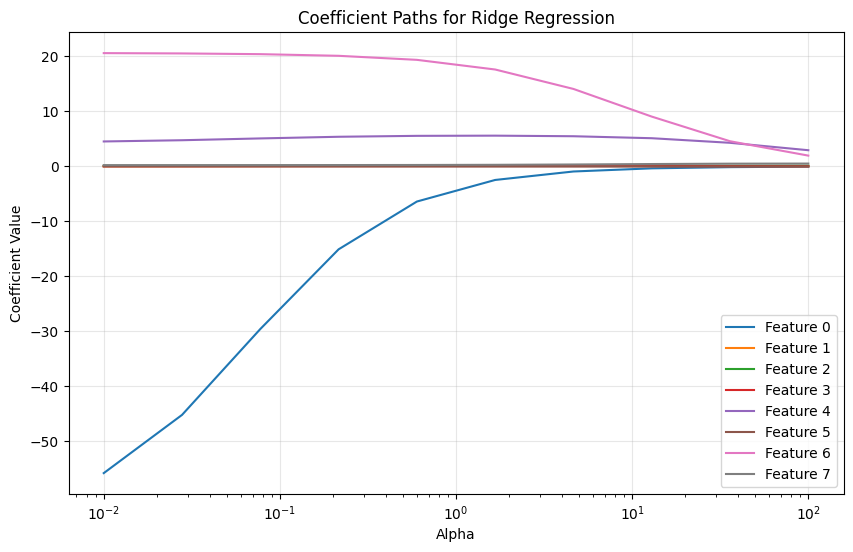

In [13]:
Optimizer_RY1.getCoefPathPlot()

### On Y2

In [14]:
Optimizer_RY2 = ModelOptimizer(data, 
                                X_columns=X.columns.tolist(), 
                                y_column=y.columns[1], 
                                regression_type='ridge',
                                alpha=param_grid,
                                random_state=2342)
Optimizer_RY2.run()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [15]:
Optimizer_RY2.getPerformanceMetrics()

,RMSE,R2,MAE,MSE
0.010000,3.052850,0.887185,2.147513,9.319895
0.027826,3.050601,0.887351,2.133911,9.306167
0.077426,3.055579,0.886983,2.124623,9.336564
0.215443,3.066533,0.886171,2.143125,9.403623
0.599484,3.067967,0.886065,2.153555,9.412420
1.668101,3.051761,0.887265,2.140795,9.313248
4.641589,3.039729,0.888152,2.123164,9.239951
12.915497,3.096820,0.883912,2.215067,9.590291
35.938137,3.241692,0.872796,2.372430,10.508565
100.000000,3.452458,0.855717,2.540353,11.919469


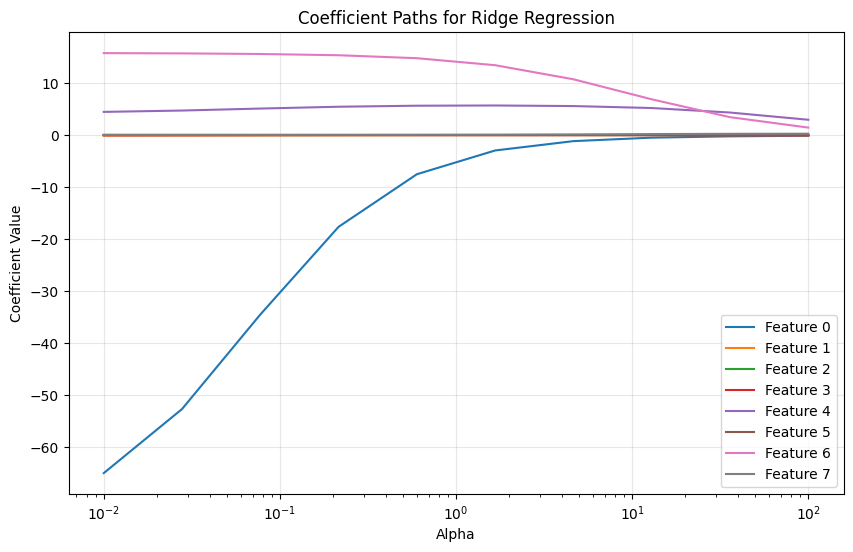

In [16]:
Optimizer_RY2.getCoefPathPlot()

## Performing Lasso Regression

### On Y1

In [17]:
Optimizer_LY1 = ModelOptimizer(Data=data,
                               X_columns=X.columns.tolist(),
                               y_column=y.columns[0],
                               regression_type='lasso',
                               random_state=2373,
                               n_jobs=-1,
                               alpha = param_grid)
Optimizer_LY1.run()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [18]:
Optimizer_LY1.getPerformanceMetrics()

,RMSE,R2,MAE,MSE
0.010000,2.872911,0.916178,2.105296,8.253619
0.027826,2.880363,0.915743,2.099132,8.296493
0.077426,2.936133,0.912448,2.111061,8.620879
0.215443,3.340756,0.886655,2.404456,11.160652
0.599484,4.010816,0.836628,2.907417,16.086642
1.668101,4.352723,0.807587,3.038460,18.946194
4.641589,4.351915,0.807658,3.030803,18.939165
12.915497,4.358153,0.807106,3.024331,18.993498
35.938137,4.440359,0.799761,3.109207,19.716792
100.000000,5.114590,0.734335,3.914033,26.159027


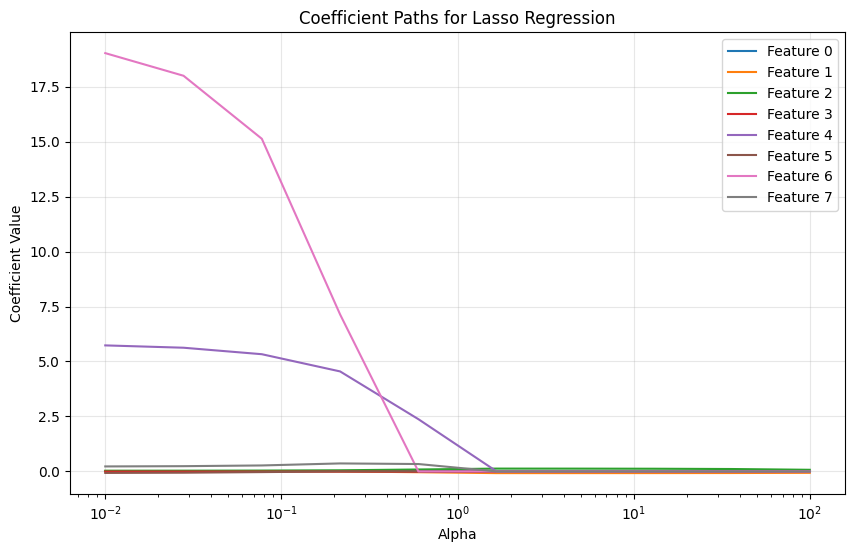

In [19]:
Optimizer_LY1.getCoefPathPlot()

### On Y2

In [20]:
Optimizer_LY2 = ModelOptimizer(Data=data,
                               X_columns=X.columns.tolist(),
                               y_column=y.columns[1],
                                 regression_type='lasso',
                                 random_state = 324,
                                    alpha = param_grid,
                                    n_jobs=-1)
Optimizer_LY2.run()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [21]:
Optimizer_LY2.getPerformanceMetrics()

,RMSE,R2,MAE,MSE
0.010000,2.780501,0.911786,2.054633,7.731184
0.027826,2.778865,0.911890,2.058929,7.722090
0.077426,2.814751,0.909599,2.087586,7.922826
0.215443,3.169831,0.885353,2.331237,10.047826
0.599484,3.479159,0.861885,2.481185,12.104549
1.668101,3.867874,0.829299,2.712300,14.960447
4.641589,3.853326,0.830580,2.700312,14.848119
12.915497,3.826424,0.832938,2.676835,14.641519
35.938137,3.858372,0.830136,2.753218,14.887036
100.000000,4.682118,0.749863,3.675778,21.922227


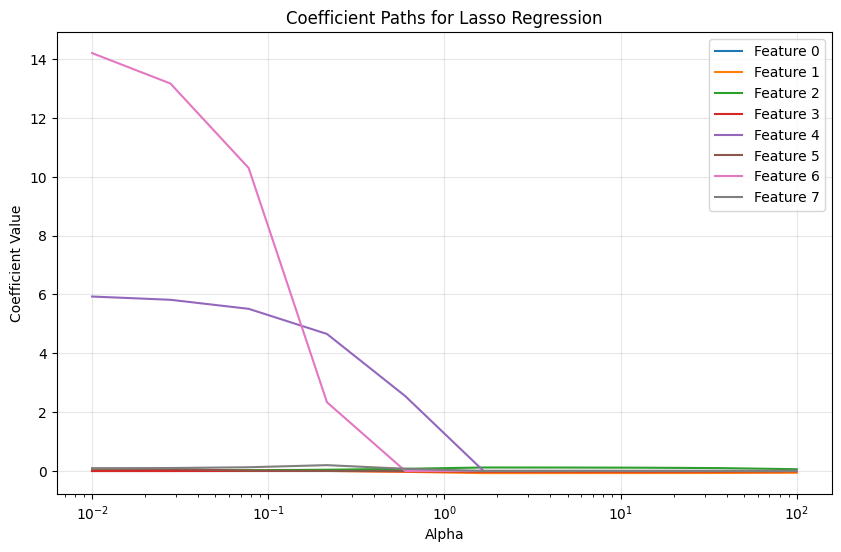

In [22]:
Optimizer_LY2.getCoefPathPlot()

## Best Fits

In [25]:
Optimizer_RY1.getBestFit()

(np.float64(0.01),
 {'RMSE': np.float64(2.6866618766640578),
  'R2': 0.924477656854799,
  'MAE': 1.9124363180174098,
  'MSE': 7.218152039520036})

In [26]:
Optimizer_RY2.getBestFit()

(np.float64(4.6415888336127775),
 {'RMSE': np.float64(3.0397287640559103),
  'R2': 0.8881523380892437,
  'MAE': 2.1231637683444435,
  'MSE': 9.23995095902887})

In [27]:
Optimizer_LY1.getBestFit()

(np.float64(0.01),
 {'RMSE': np.float64(2.8729112302298296),
  'R2': 0.9161781318350076,
  'MAE': 2.1052955875206383,
  'MSE': 8.253618936780674})

In [28]:
Optimizer_LY2.getBestFit()

(np.float64(0.027825594022071243),
 {'RMSE': np.float64(2.778864950443099),
  'R2': 0.9118895720897633,
  'MAE': 2.0589291847108004,
  'MSE': 7.722090412801125})

## Boxplot of Dataset

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

<Axes: >

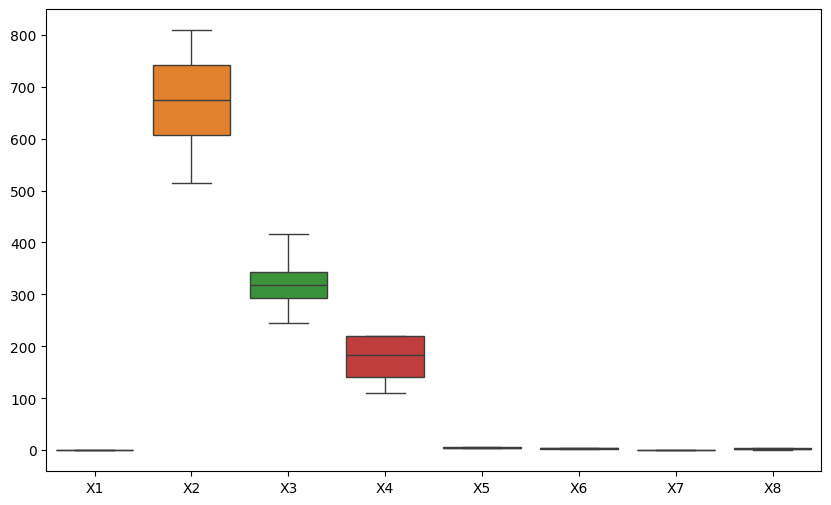

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data.iloc[:, 0:8])